# 14.1 Training a Decision Tree Classifier

I need to train a classifier using decision tree.

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)

# Train model 
model = decisiontree.fit(features, target)

In [2]:
# Make new observation
observation = [[5, 4, 3, 2]]

# Predict observation's class
model.predict(observation)

array([1])

In [3]:
# View predicted class probabilities for the three class
model.predict_proba(observation)

array([[0., 1., 0.]])

In [5]:
# Create decision tree classifier object using entropy
decisiontree_entropy = DecisionTreeClassifier(criterion='entropy',
                                              random_state=0)
# Train model 
model_entropy = decisiontree_entropy.fit(features, target)
model_entropy

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

# 14.2 Training a Decision Tree Regressor 

I need to train a regression model using a decision tree.

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets

# Load date with only two features
boston = datasets.load_boston()
features = boston.data[:, 0:2]
target = boston.target

# Create decition tree classifier object
decisiontree = DecisionTreeRegressor(random_state=0)

# Train model 
model = decisiontree.fit(features, target)
model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [8]:
# Make new observation
observation = [[0.02, 16]]

# Predict observation's value
model.predict(observation)

array([33.])

We can construct a tree whose split reduce mean absolute error (MAE):

In [10]:
# Create a decision tree classifier object using entropy
decisiontree_mae = DecisionTreeRegressor(criterion='mae', random_state=0)

# Train model
model_mae = decisiontree_mae.fit(features, target)
model_mae

DecisionTreeRegressor(criterion='mae', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

# 14.3 Visulaizing a Decision Tree Model

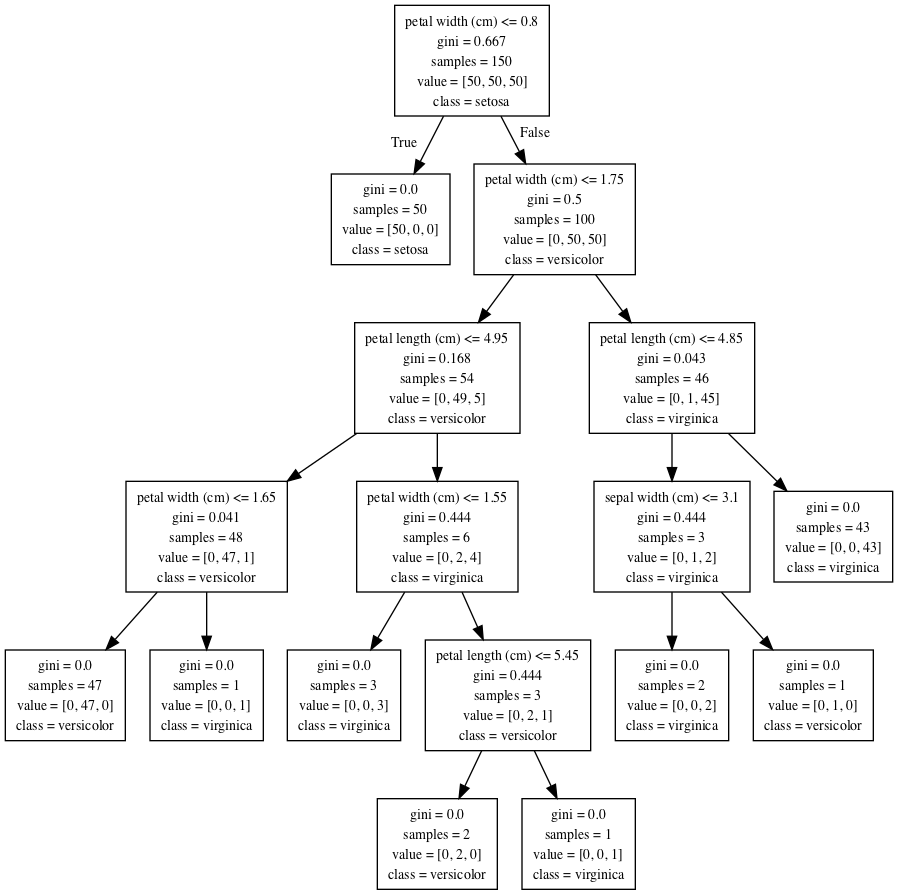

In [18]:
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)

# Train model
model = decisiontree.fit(features, target)

# Create DOT data
dot_data = tree.export_graphviz(decisiontree, out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [19]:
# Create PDF
graph.write_pdf('iris.pdf')

True

In [20]:
# Create PNG
graph.write_png('iris_png')

True

# 14.4 Training a Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = randomforest.fit(features, target)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
# Make new onsevation
observation = [[5, 4, 3, 2]]

# Predict obsevation's class
model.predict(observation)

array([1])

In [23]:
# Create random forest classifier object using entropy
randomforest_entropy = RandomForestClassifier(criterion='entropy',
                                              random_state=0)

# Train model
model_entropy = randomforest_entropy.fit(features, target)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# 14.5 Training a Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets

# Load date with only two features
boston = datasets.load_boston()
features = boston.data[:, 0:2]
target = boston.target

# Create random forest classifier object
randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)

# Train model
model = randomforest.fit(features, target)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# 14.6 Identifying Important Features in Random Forests

I need to know which features are most important in a random forest model.

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


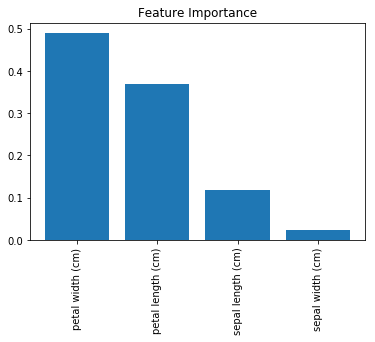

In [30]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model 
model = randomforest.fit(features, target)

# Caluculate feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [iris.feature_names[i] for i in indices]

# Create plot
plt.figure()
plt.title('Feature Importance')
plt.bar(range(features.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(features.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [31]:
# View feature importances
model.feature_importances_

array([0.11896532, 0.0231668 , 0.36804744, 0.48982043])

# 14.7 Selecting Important Features in Random Forests

I need to conduct feature selection on a random forest.

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Create object that selects features with importances greater than 
# or equal to a threshold
selector = SelectFromModel(randomforest, threshold=0.3)

# Feature new feature matrix using selector
features_important = selector.fit_transform(features, target)

# Train random forest using most importance features
model = randomforest.fit(features_important, target)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# 14.8 Handling Imbalanced Classes

I have a target vector with highly imbalanced classes 

and want to train a random forest model.

In [43]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Make class highly imbalanced by removing first 40 observations
features = features[40:, :]
target = target[40:]

# Create target vector indicating if class 0, otherwise 1
target = np.where((target==0), 0, 1)

# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1, 
                                      class_weight='balanced')

# Train model
model = randomforest.fit(features, target)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# 14.9 Controlling Tree Size

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0, 
                                      max_depth=None,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      min_weight_fraction_leaf=0,
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0)

# Train model
model = decisiontree.fit(features, target)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0, presort=False, random_state=0,
            splitter='best')

# 14.10 Imporving Performance Through Boosting

In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create adaboost tree classifier object
adaboost = AdaBoostClassifier(random_state=0)

# Train model 
model = adaboost.fit(features, target)
model

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=0)

# 14.11 Evaluating Random Forests with Out-of-Bag Errors

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_estimators=1000,
                                      oob_score=True, n_jobs=-1)

# Train model 
model = randomforest.fit(features, target)

# View out-of-bag-error
randomforest.oob_score_

0.9533333333333334